**STARTING WITH DATA IMPORTING AND PREPARTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/New folder/Fraud.csv")

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#would help in EDA
data['isFraud'] = data['isFraud'].map({1: 'yes', 0: 'no'})

**AFTER GOING THROUGHOUT THE DATA I FOUND THAT THE COLUMN (nameOrig,nameDest) ARE REDUNDANT,
SO REMOVING THEM SEEMS TO BE MORE PRACTICAL. SO I AM DROPPING THEM.**

In [ ]:
data=data.drop(["nameOrig","nameDest"],axis=1)

**COLUMNS:  oldbalanceOrg,newbalanceOrig ARE REDUNDANT AS WE ALREADY HAVE amount COLUMN THAT SIGNIFIES (newbalanceOrig -oldbalanceOrg), SO I ASSUME THEY WONT BE OF MUCH SIGNIFICANCE.**

In [ ]:
data=data.drop(["oldbalanceOrg","newbalanceOrig"],axis=1)
data.head()

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0.0,0.0,no,0
1,1,PAYMENT,1864.28,0.0,0.0,no,0
2,1,TRANSFER,181.00,0.0,0.0,yes,0
3,1,CASH_OUT,181.00,21182.0,0.0,yes,0
4,1,PAYMENT,11668.14,0.0,0.0,no,0


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 step              0
type              0
amount            0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Check for NaN values in the entire dataset
nan_counts = data.isnull().sum()

# Display columns with NaN values and their counts
columns_with_nan = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
Series([], dtype: int64)


In [ ]:
# Drop row with NaN values since its only one row otherwise we coulD have imputed value
data = data.dropna()

**I WILL NOW USE THE COLUMN step TO CREATE A COLUMN THAT SIGNIFIES AT WHICH TIME MOSTLY FRAUDS OCCUR.**

In [ ]:
import pandas as pd

# Assuming your DataFrame is 'df'
data['hour_of_day'] = data['step'] % 24

# Define time periods based on the hour of the day
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
data['time_of_day_fraud'] = pd.cut(data['hour_of_day'], bins=bins, labels=labels, include_lowest=True)

# Drop the 'hour_of_day' feature to avoid redundancy
data = data.drop('hour_of_day', axis=1)

data.head()

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time_of_day_fraud
0,1,PAYMENT,9839.64,0.0,0.0,no,0,night
1,1,PAYMENT,1864.28,0.0,0.0,no,0,night
2,1,TRANSFER,181.00,0.0,0.0,yes,0,night
3,1,CASH_OUT,181.00,21182.0,0.0,yes,0,night
4,1,PAYMENT,11668.14,0.0,0.0,no,0,night


<ipython-input-13-f8a2d52db9a1>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


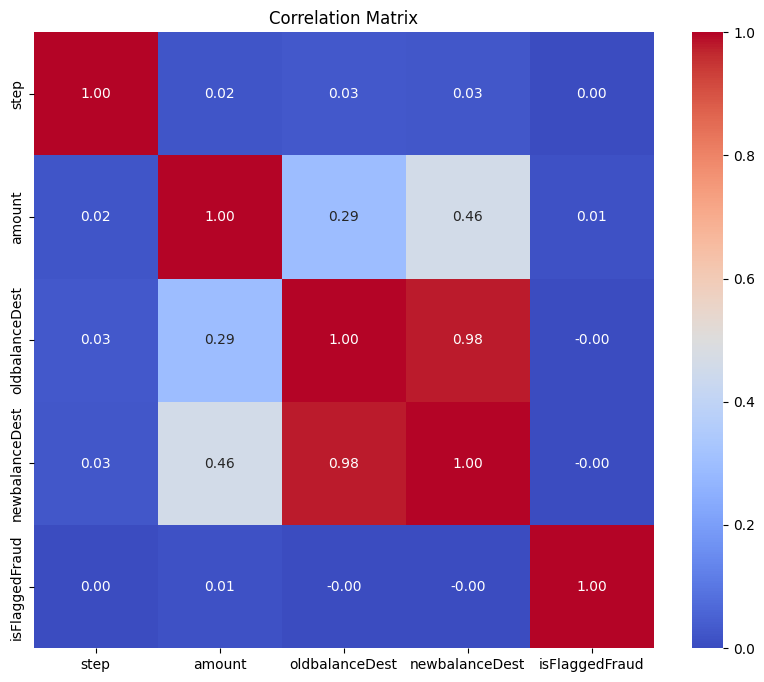

In [ ]:
#VISUALIZING CORRELATION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame
# Check unique values and distribution of 'isFlaggedFraud'
print("Unique values of 'isFlaggedFraud':", data['isFlaggedFraud'].unique())
print("\nDistribution of 'isFlaggedFraud':\n", data['isFlaggedFraud'].value_counts())

Unique values of 'isFlaggedFraud': [0 1]

Distribution of 'isFlaggedFraud':
 0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


FROM ANALYSIS:

1)UNIQUE VALUES OF 'ISFLAGGEDFRAUD': IT HAS TWO UNIQUE VALUES, 0 AND 1, 0 FOR NOT FLAGGED FRAUD AND 1 FOR FLAGGED FRAUD.

2) DISTRIBUTION OF 'ISFLAGGEDFRAUD': THE MAJORITY OF THE DATA (6362604 OUT OF 6362620) HAS THE VALUE 0, WITH ONLY 16 INSTANCES HAVING THE VALUE 1.

3) This feature has less variation across the data.

In [ ]:
# Drop 'isFlaggedFraud' from the dataset
data = data.drop('isFlaggedFraud', axis=1)
data.head()

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,time_of_day_fraud
0,1,PAYMENT,9839.64,0.0,0.0,no,night
1,1,PAYMENT,1864.28,0.0,0.0,no,night
2,1,TRANSFER,181.00,0.0,0.0,yes,night
3,1,CASH_OUT,181.00,21182.0,0.0,yes,night
4,1,PAYMENT,11668.14,0.0,0.0,no,night


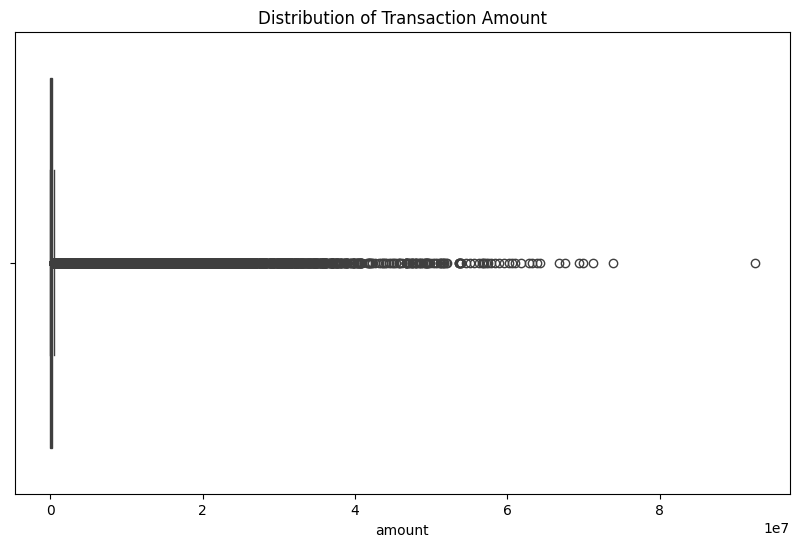

Statistical Information for 'amount':
 count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'amount' using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['amount'])
plt.title('Distribution of Transaction Amount')
plt.show()

# Get statistical information for 'amount' to identify potential outliers
amount_stats = data['amount'].describe()
print("Statistical Information for 'amount':\n", amount_stats)

In [ ]:
#WE WILL fIND OUT A ESTIMATE FIGURE OF OUTLIERS USING Z-SCORE METHOD

from scipy.stats import zscore

# Calculate the Z-scores for 'amount'
z_scores = zscore(data['amount'])

# Define a threshold for identifying outliers
threshold = 3

# Identify the indices and values of outliers
outlier_indices = abs(z_scores) > threshold
outlier_values = data.loc[outlier_indices, 'amount']

# Display information about outliers
print(f"Number of outliers: {sum(outlier_indices)}")
print("\nOutlier values:")
print(outlier_values)

Number of outliers: 44945

Outlier values:
359        2421578.09
375        2545478.01
376        2061082.82
1153       3776389.09
1202       2258388.15
              ...    
6362584    5674547.89
6362598    4009058.39
6362599    4009058.39
6362616    6311409.28
6362617    6311409.28
Name: amount, Length: 44945, dtype: float64


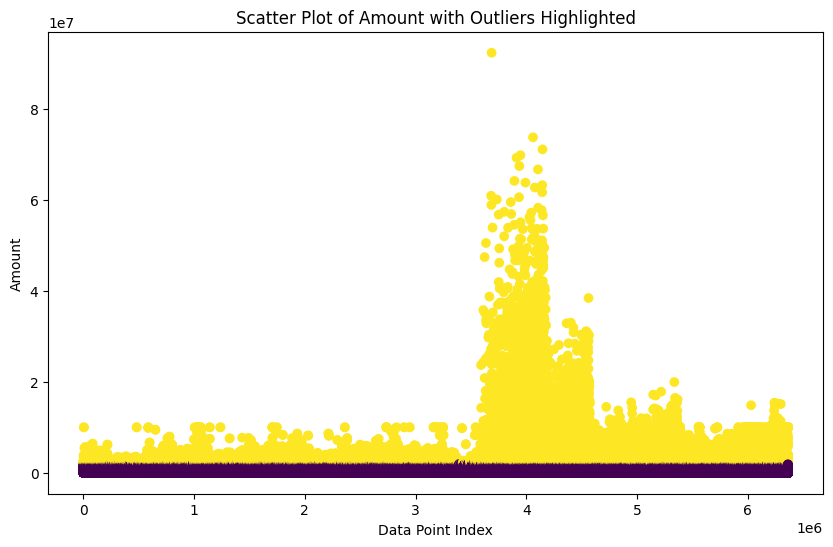

In [ ]:
# Create a scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(x=data.index, y=data['amount'], c=outlier_indices, cmap='viridis', marker='o')
plt.title('Scatter Plot of Amount with Outliers Highlighted')
plt.xlabel('Data Point Index')
plt.ylabel('Amount')
plt.show()

WE HAVE HANDLED OUTLIERS BELOW YOU WILL SEE IT DOWNWARDS

**EXPLORATORY ANALYSIS FOR AVAILABEL DATASET**

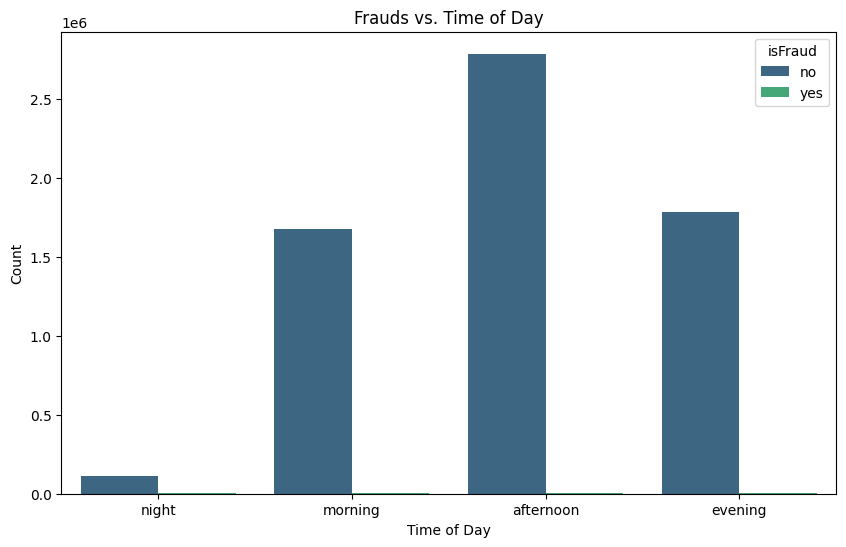

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'df' with 'time_of_day_fraud' and 'isFraud' columns
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day_fraud', hue='isFraud', data=data, palette='viridis')

plt.title('Frauds vs. Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

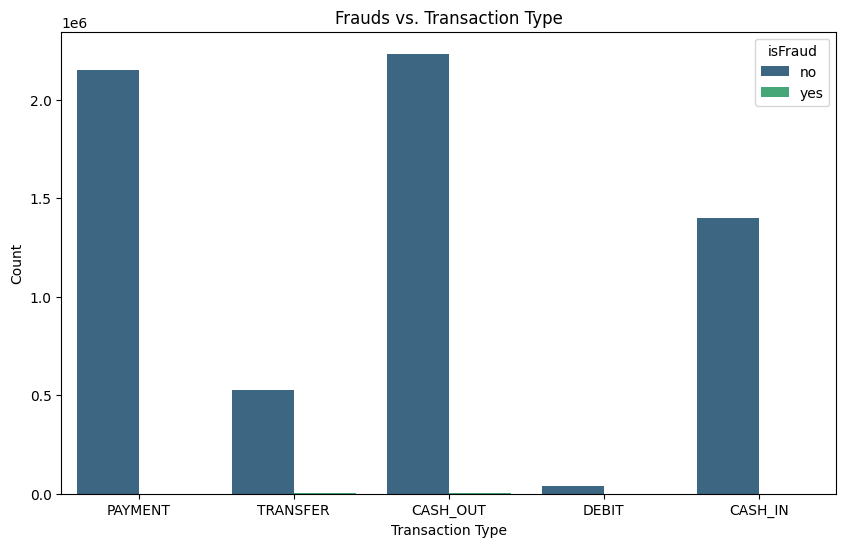

In [ ]:
# Assuming your DataFrame is 'df' with 'type' and 'isFraud' columns
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=data, palette='viridis')

plt.title('Frauds vs. Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<ipython-input-21-22b21716c148>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=data, palette='viridis')


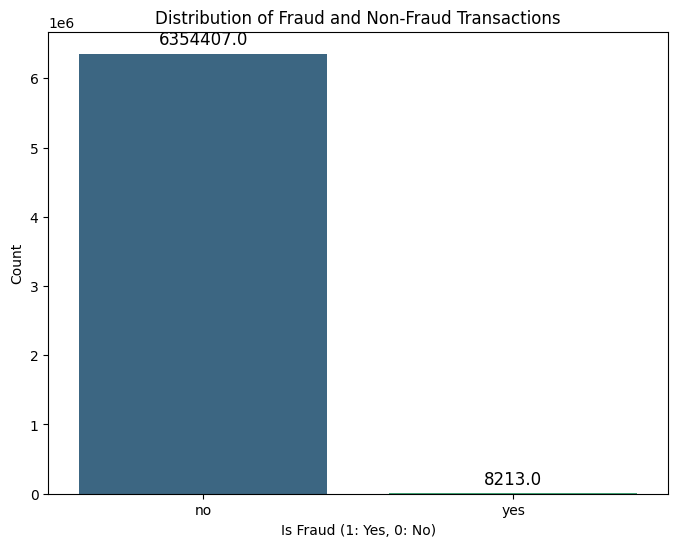

In [ ]:
# Visualize the distribution of fraud and non-fraud transactions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFraud', data=data, palette='viridis')

# Add count values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Is Fraud (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Apply log transformation
data['amount_log_transformed'] = np.log1p(data['amount'])
data['oldbalanceDest_log_transformed'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log_transformed'] = np.log1p(data['newbalanceDest'])

# Check the summary statistics of the log-transformed 'amount' column
amount_stats_log_transformed = data['amount_log_transformed'].describe()
print(amount_stats_log_transformed)

count    6.362620e+06
mean     1.084087e+01
std      1.814509e+00
min      0.000000e+00
25%      9.502306e+00
50%      1.122355e+01
75%      1.224876e+01
max      1.834213e+01
Name: amount_log_transformed, dtype: float64


In [ ]:
data.head(3)

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,time_of_day_fraud,amount_log_transformed,oldbalanceDest_log_transformed,newbalanceDest_log_transformed
0,1,PAYMENT,9839.64,0.0,0.0,no,night,9.194276,0.0,0.0
1,1,PAYMENT,1864.28,0.0,0.0,no,night,7.531166,0.0,0.0
2,1,TRANSFER,181.00,0.0,0.0,yes,night,5.204007,0.0,0.0


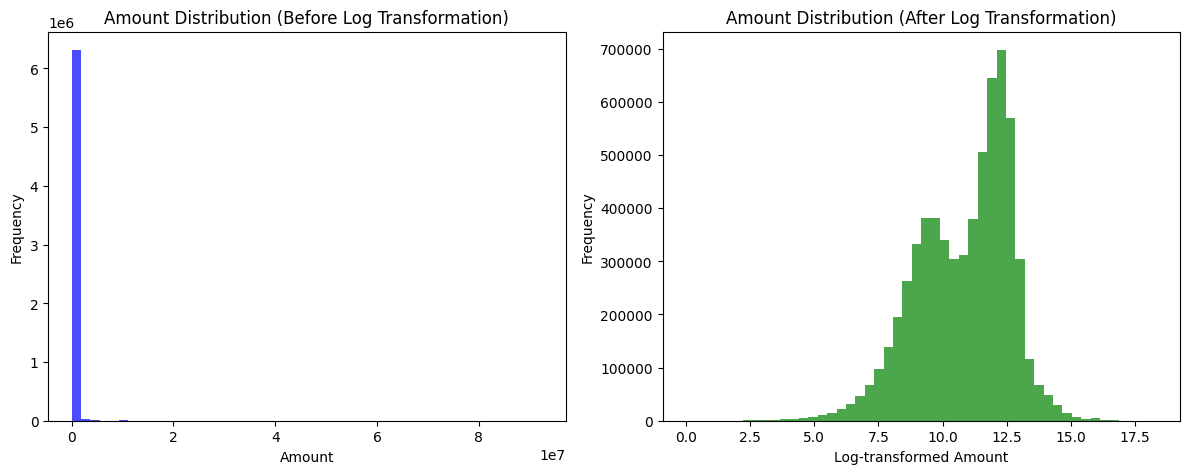

In [ ]:
#comparing graphs of outlier bias befor vs after log transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution before log transformation
axes[0].hist(data['amount'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Amount Distribution (Before Log Transformation)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Plot the distribution after log transformation
axes[1].hist(data['amount_log_transformed'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Amount Distribution (After Log Transformation)')
axes[1].set_xlabel('Log-transformed Amount')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#encoding the time durations for model training
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[['morning', 'afternoon', 'evening', 'night']])

# Fit and transform the 'time_of_day' column
data['time_of_day_encoded'] = ordinal_encoder.fit_transform(data[['time_of_day_fraud']])

In [ ]:
#payment type encoding
data = pd.concat([data, pd.get_dummies(data['type'], prefix='payment_type')], axis=1)

In [ ]:
data

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,time_of_day_fraud,amount_log_transformed,oldbalanceDest_log_transformed,newbalanceDest_log_transformed,time_of_day_encoded,payment_type_CASH_IN,payment_type_CASH_OUT,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER
0,1,PAYMENT,9839.64,0.00,0.00,no,night,9.194276,0.000000,0.000000,3.0,0,0,0,1,0
1,1,PAYMENT,1864.28,0.00,0.00,no,night,7.531166,0.000000,0.000000,3.0,0,0,0,1,0
2,1,TRANSFER,181.00,0.00,0.00,yes,night,5.204007,0.000000,0.000000,3.0,0,0,0,0,1
3,1,CASH_OUT,181.00,21182.00,0.00,yes,night,5.204007,9.960954,0.000000,3.0,0,1,0,0,0
4,1,PAYMENT,11668.14,0.00,0.00,no,night,9.364703,0.000000,0.000000,3.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,yes,evening,12.735768,0.000000,12.735768,2.0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,0.00,0.00,yes,evening,15.657870,0.000000,0.000000,2.0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,68488.84,6379898.11,yes,evening,15.657870,11.134441,15.668663,2.0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,0.00,0.00,yes,evening,13.652996,0.000000,0.000000,2.0,0,0,0,0,1


**We will train model twice that is: one with outliers and other with log transformations.**

**SO FIRST MODEL WOULD BE WITHOUT LOG TRANSFORMATIONS:**

In [ ]:
#taking features and target

X = data.drop(columns=['isFraud',"time_of_day_fraud","type","amount_log_transformed","oldbalanceDest_log_transformed","newbalanceDest_log_transformed"], axis=1)
y = data['isFraud'].map({'yes': 1, 'no': 0})

In [ ]:
#importing required libraries
from xgboost  import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, make_scorer, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Fit the model
    classifier.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}')

    # Example:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'{name} - Precision: {precision:.2f}, Recall: {recall:.2f}')

    # Print classification report for more detailed metrics
    print(f'{name} - Classification Report:\n{classification_report(y_test, y_pred)}\n')

XGBoost - Accuracy: 1.00
XGBoost - Precision: 0.96, Recall: 0.71
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524


[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.312139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747
LightGBM - Ac

**NOW WE WILL TRAIN OUR LOG TRANSFORMED MODEL AND WILL SEE FEW ALGO AS ITS TAKING TOO MUCH TIME IN TRAINING EVERY MODEL**

In [ ]:
X1 = data.drop(columns=['isFraud',"time_of_day_fraud","type","amount","oldbalanceDest","newbalanceDest"], axis=1)
y1 = data['isFraud'].map({'yes': 1, 'no': 0})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'LogisticRegression': LogisticRegression()}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Fit the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}')

    # Example:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'{name} - Precision: {precision:.2f}, Recall: {recall:.2f}')

    # Print classification report for more detailed metrics
    print(f'{name} - Classification Report:\n{classification_report(y_test, y_pred)}\n')

XGBoost - Accuracy: 1.00
XGBoost - Precision: 0.96, Recall: 0.71
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524


[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747
LightGBM - Ac

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Accuracy: 1.00
LogisticRegression - Precision: 0.99, Recall: 0.31
LogisticRegression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.31      0.48      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.66      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524




**SO AS WE CAN SEE THERE WAS NOT MUCH DIFFERNCE AND MODELS PERFORMED EQUALLY GOOD ON BOTH TYPE OF DATASET. NOW WE WILL TRY TO TUNE THE ALGORITHM WITH WORST RESULTS TO IMPROVE THE ACCURACY, AS WE KNOW ITS A TIME CONSUIMG PROCESS SO WE CAN PROCESS ALL THE ALGORITHMS**


#Best Performing Models:

XGBoost Model,
Random Forest Model

#Models with Room for Improvement:

LightGBM Model,
K-Neighbors Model,
Logistic Regression Model



In [ ]:
#we will fine tune hyper parameter for logistic regression.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create Logistic Regression model
logreg_model = LogisticRegression()

# Define parameter search space for random search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, scoring='precision', cv=3, n_iter=20, n_jobs=-1)

# Perform random search
random_search.fit(X_train, y_train)

# Print best parameters and best precision score
print("Best parameters:", random_search.best_params_)
print("Best Precision Score:", random_search.best_score_)

# Get the best model
best_logreg_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_logreg_model.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Precision on Test Set:", precision)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(itera

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
Best Precision Score: 0.9994683678894205
Precision on Test Set: 0.9980544747081712


The FitFailedWarning indicates that some fits failed with different errors, and the test scores for those configurations are marked as 'nan' (not a number). This can happen when certain combinations of hyperparameters are not compatible with the solver or penalty options.

In this case, it seems that the logistic regression model with some specific combinations of solver and penalty options is causing issues. The best parameters obtained are {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01} with a high precision score on the test set.

**Logistic Regression model with the best hyperparameters and then compile it with the feature importance:**

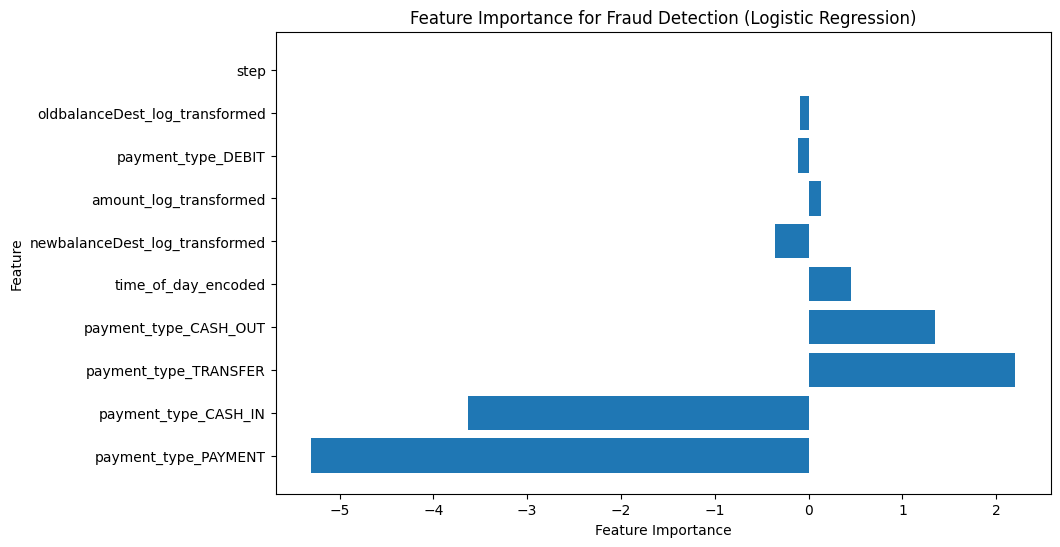

In [ ]:
# Best hyperparameters obtained from the search
best_params = {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}

# Create and train Logistic Regression model with the best parameters
logreg_model = LogisticRegression(**best_params)
logreg_model.fit(X_train, y_train)

# Get feature importances
feature_importances = logreg_model.coef_[0]

# Sort features by importance
sorted_features = sorted(zip(feature_importances, X_train.columns), key=lambda x: abs(x[0]), reverse=True)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), [importance for importance, feature in sorted_features], align="center")
plt.yticks(range(len(sorted_features)), [feature for importance, feature in sorted_features])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Fraud Detection (Logistic Regression)")
plt.show()

Q1.   Data preprocessing was done in initial phase of code.

Q2.   In my model basically starting with cleaning, preprocessing i used the features which i found relevant. In training part i used many algorithms to ensure best algorithm for the model. XGBoost followed by Random forest. Actually the dataset was much limited in terms of features that i was expecting so i tried to get best out of them. As you can see the results in the end models are performing pretty well, and i also did parameter tuning for log reg algorithm as it was too much time taking and i had to keep up with the time. Hyper parameter tuning significantly optimised this algorithm.

Q3.   While in code also i have mentioned my criteria of choosing them again=

=step(As i thought it was a time series variable i kept it although it was not of much use but i derived durations of day from it and that was also a contributor variable in model),
=type(A important feature since it can specify which kind of payment generally includes fraud and would help in pattern recognition),
=amount(Its the most obvious and important variable as we can easily classify amount transaction of too much larger sum can be a fraud),
=nameOrig(Could have been a factor if we had to analyze past data to figure out user who is a compatible fraud but in a model, when new data comes its not important same user name would be used in transcation),
=oldbalanceOrg,newbalanceOrig(they were redundant as amount variable was already there which is their differnce),
=nameDest(Lil bit same as nameOrig),
=oldbalanceDest(generally fraud money is transferred to a account with low balance so i thought it as an imp factor)
=newbalanceDest(An exponential increase in reciever account caould be suspicious so i kept it)
=isFraud(It was my target variable)
=isFlaggedFraud(Earlier i thought it as an important variable but later on in analysis i found it was not much contributing and variying so it was redundant.)

Q4.  I used the performances metrices for that and model performance is already printed below them so you can find it there.

Q5.  On taking out feature importance i found out:

#type variables encoded variable:
<1> payment_type_PAYMENT (-5.31):
This negative importance suggests that transactions involving payments are strongly indicative of non-fraudulent activities. The more negative the score, the less likely the transaction is associated with fraud.

<2> payment_type_CASH_IN (-3.63):
Similarly to payment_type_PAYMENT, cash-in transactions have a negative importance, implying that they are less likely to be associated with fraud. Both payment types (PAYMENT and CASH_IN) contribute negatively to fraud prediction.


<3> payment_type_TRANSFER (2.20):
The positive importance indicates that transfer transactions are strong indicators of potential fraud. Higher scores suggest a significant contribution to identifying fraudulent behavior.


<4> payment_type_CASH_OUT (1.34):
Cash-out transactions also have a positive impact on fraud prediction, though to a lesser extent than transfers. Nevertheless, they contribute positively to identifying potential fraud.

<5> payment_type_DEBIT (-0.11):
Debit transactions have a negative impact on fraud prediction, suggesting that they are less associated with fraudulent activities. This aligns with the negative importance score.

#i derived it from step variable and it was a good contibutor:
<6> time_of_day_encoded (0.45):
This positive importance suggests that certain times of the day encoded in the feature contribute positively to identifying potential fraud. Specific time periods might be associated with an increased likelihood of fraud.


#numerical columns:
<7> newbalanceDest_log_transformed (-0.36):
The negative importance implies that lower new balances at the destination, especially when log-transformed, might be indicative of fraud. Decreased destination balances contribute negatively to fraud prediction.

<8> amount_log_transformed (0.13):
The positive importance indicates that higher transaction amounts, especially when log-transformed, contribute positively to fraud prediction. Larger transaction amounts are considered indicative of potential fraud.


<9> oldbalanceDest_log_transformed (-0.09):
Similar to new balances, lower old balances at the destination, when log-transformed, might be indicative of fraud. The negative importance suggests that decreased old balances contribute negatively to fraud prediction.


<10> step (0.00):
The very low importance of the 'step' feature suggests that it does not significantly contribute to fraud prediction in the model.


Q6.  Yes these factors makes sense and explanation i have given i above parts also in code and answers also so you could conclude from their.

Q7.  When updating its infrastructure, a company should implement a comprehensive set of preventive measures to ensure the security and integrity of its systems. Some key prevention strategies include:

<1> Conduct regular security audits to identify vulnerabilities and weaknesses in the infrastructure.

<2> Enforce strict access controls and authentication mechanisms to ensure that only authorized personnel can access critical systems and data.

<3> Regularly update and patch software, operating systems, and applications to address known vulnerabilities and ensure that the infrastructure is up-to-date with the latest security features.

<4> Employ firewalls, intrusion detection/prevention systems, and other network security measures to protect against unauthorized access and cyber threats.

<5> Provide ongoing cybersecurity training to employees to enhance awareness and ensure adherence to security best practices.

<6> Develop and implement an incident response plan to respond effectively to any security incidents or breaches.

<7> Regularly backup critical data and establish a robust disaster recovery plan to minimize the impact of potential data loss.

Q8.  To determine the effectiveness of the implemented preventive measures, you can employ the following strategies:

<1> Establish key performance indicators (KPIs) and metrics related to security, such as the number of detected vulnerabilities, successful logins, failed login attempts, and incidents detected.

<2> Conduct regular security audits and penetration testing to assess the robustness of the security infrastructure. Identify and address any vulnerabilities discovered during these tests.

<3> Implement continuous monitoring tools and alert systems to detect and respond to suspicious activities or potential security breaches in real-time.

<4> Regularly review and analyze security logs to identify anomalies or unusual patterns that might indicate a security threat.

<5> Solicit feedback from employees and stakeholders regarding the effectiveness of security measures. Use this feedback to continuously improve security protocols.

